In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
#reading the dataset
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
def data_checks(dataframe:pd.DataFrame):
        """
        perform checks in the dataset

        args: 
            df (pd.DataFrame): the DataFrame which we are performing checks
        
        returns:
            dictionary of checks

        """
        checks = {
            "info":dataframe.info(),
            "shape":dataframe.shape,
            "uniqueness":dataframe.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10),
            "missing_values":dataframe.isnull().sum(),
            "duplicates":dataframe.duplicated().sum(),
            "data_snapshot":dataframe.head()

        }
        return checks
data_checks(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

{'info': None,
 'shape': (569, 33),
 'uniqueness': id                      569
 smoothness_se           547
 fractal_dimension_se    545
 area_worst              544
 concave points_mean     542
 compactness_se          541
 radius_se               540
 area_mean               539
 concavity_worst         539
 compactness_mean        537
 dtype: int64,
 'missing_values': id                           0
 diagnosis                    0
 radius_mean                  0
 texture_mean                 0
 perimeter_mean               0
 area_mean                    0
 smoothness_mean              0
 compactness_mean             0
 concavity_mean               0
 concave points_mean          0
 symmetry_mean                0
 fractal_dimension_mean       0
 radius_se                    0
 texture_se                   0
 perimeter_se                 0
 area_se                      0
 smoothness_se                0
 compactness_se               0
 concavity_se                 0
 concave points_se 

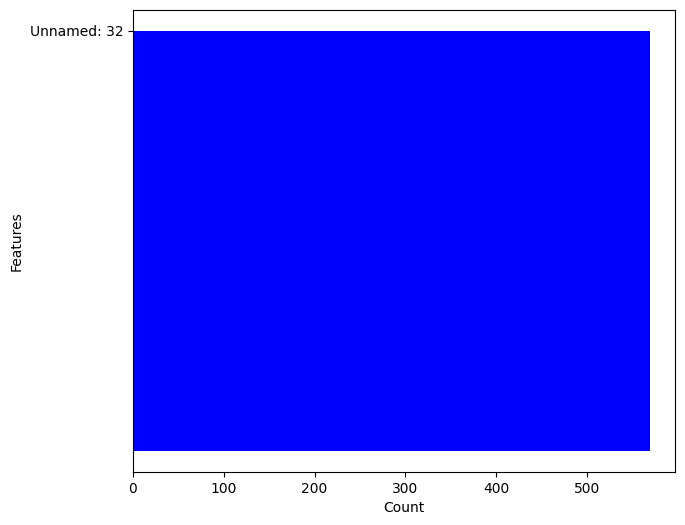

In [4]:
def missing_value_analysis(data:pd.DataFrame):
    """
    this function is for performing analysis on missing values
    
    args:
        data (pd.DataFrame): input the dataframe to perform analysis upon
    
    return:
        returns a plot of all the missing value columns and their frequenct
    """
    cols_with_missing = data.isnull().sum()
    cols_with_missing = cols_with_missing[cols_with_missing>0]
    cols_with_missing.sort_values(inplace=True)
    fig, ax = plt.subplots(figsize=(7,6))  
    width = 0.70 # the width of the bars 
    ind = np.arange(len(cols_with_missing))  # the x locations for the groups
    ax.barh(ind, cols_with_missing, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(cols_with_missing.index, minor=False)
    plt.xlabel('Count')
    plt.ylabel('Features')
missing_value_analysis(df)

In [5]:
# Get column names
col = df.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
def get_xy(data:pd.DataFrame,list_drp:list):
    """
    set the x and y column
    
    args:
        data(pd.DataFrame): the dataFrame which we are extracting the x and y
    
    returns:
        y and X in form of pandas series
    
    """
    y = data.diagnosis # M or B 
    X = data.drop(list_drp,axis = 1 )
    return y,X
y,X = get_xy(df,['Unnamed: 32','id','diagnosis'])

In [7]:
def describe_independent(X):
    """
    gets data subset to describe and performs simple descriptive measures
    on the independent variable
    
    args:
        X (pd.DataFrame): a subset of the main data
    
    returns:
        description in form of a dataframe
    """
    return X.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')
describe_independent(X)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


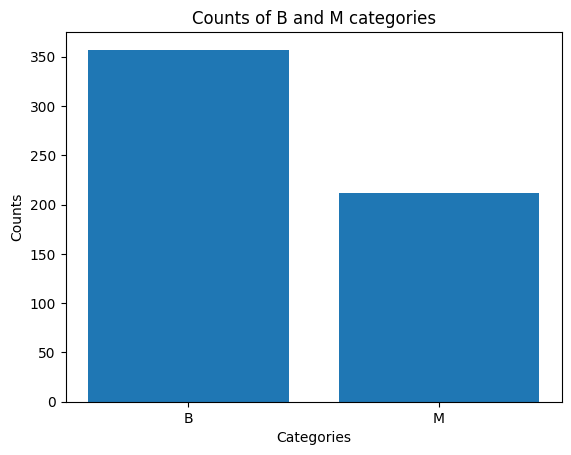

In [8]:
def describe_dependent(y):
    """
    gets the independent variable and performs simple descriptive measures, like counts
    
    args: 
        y (pd.Series): y column of dependent variable
    
    returns:
        plot of counts of the dependent variable
    """

    value_counts = y.value_counts()
    categories = value_counts.index
    counts = value_counts.values

    fig, ax = plt.subplots()
    ax.bar(categories, counts)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Counts')
    ax.set_title('Counts of B and M categories')
    plt.show()
describe_dependent(y)

In [9]:
def test_data_normality(x):
    """
    a function to perform tests on normality
    
    args:
        x (pd.DataFrame):independent variable
    
    returns:
        boolean True or False
    """
    
    test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
    normal = pd.DataFrame(X)
    normal = normal.apply(test_normality)
    return (not normal.any())
test_data_normality(X)

False

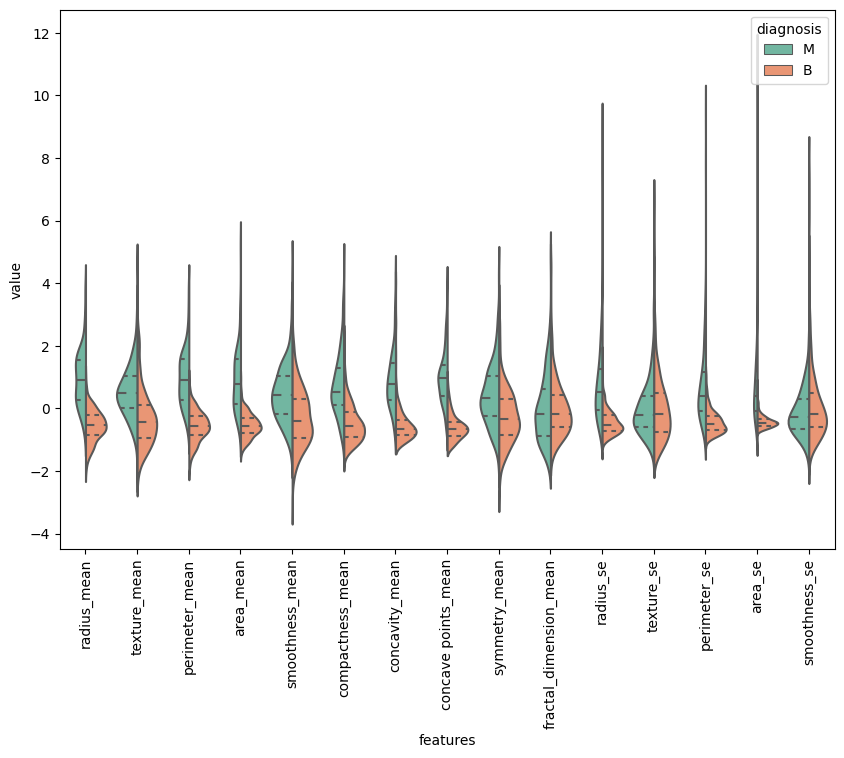

In [10]:
def visualize_variability(X:pd.DataFrame,y:pd.DataFrame,start:int,stop:int):
    """
    displays variability through violin plot
    
    args:
        X (pd.Series): independent variables
        y (pd.Series): dependent variables
        start (int): where to start in terms of features 
        stop (int): where to stop in terms of features
    
    returns:
        violin plots
    """
    data_dia = y
    data = X
    # standardization of the data
    data_n_2 = (data - data.mean()) / (data.std())
    data = pd.concat([y,data_n_2.iloc[:,start:stop]],axis=1)
    data = pd.melt(data,id_vars="diagnosis",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(10,7))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
    plt.xticks(rotation=90)
visualize_variability(X,y,0,15)

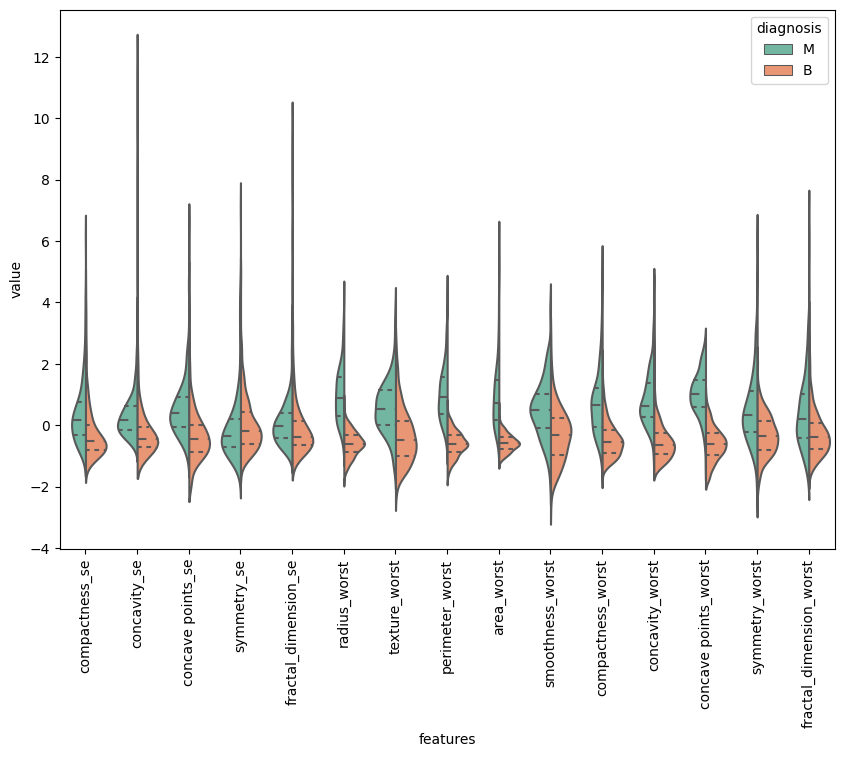

In [11]:
visualize_variability(X,y,15,30)